In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
log_names = ['epoch','seconds','loss','top-1 Acc','top-5 Acc','F1-Score','Precision','Recall']

deit_train = pd.read_csv('../../networks/birds_deit/logs_train.csv',sep=';')
levit_train = pd.read_csv('../../networks/birds_levit/logs_train.csv',sep=';')
effnet_train = pd.read_csv('../../networks/birds_effnet/logs_train.csv',sep=';')

deit = pd.read_csv('../../networks/birds_deit/logs_valid.csv',sep=';')
levit = pd.read_csv('../../networks/birds_levit/logs_valid.csv',sep=';')
effnet = pd.read_csv('../../networks/birds_effnet/logs_valid.csv',sep=';')

deit_npt = pd.read_csv('../../networks/birds_deit_npt/logs_valid.csv',sep=';')
deit_npt_train = pd.read_csv('../../networks/birds_deit_npt/logs_train.csv',sep=';')

levit_npt = pd.read_csv('../../networks/birds_levit_npt/logs_valid.csv',sep=';')
levit_npt_train = pd.read_csv('../../networks/birds_levit_npt/logs_train.csv',sep=';')

effnet_npt = pd.read_csv('../../networks/birds_effnet_npt/logs_valid.csv',sep=';')
effnet_npt_train = pd.read_csv('../../networks/birds_effnet_npt/logs_train.csv',sep=';')

In [3]:
def plot_by_epoch(col):
    plt.plot(deit['epoch'], deit[col])
    plt.plot(levit['epoch'], levit[col])
    plt.plot(effnet['epoch'], effnet[col])
    plt.grid(True)
    plt.legend(['Deit','LeViT','EffNet'])

def plot_by_time(col, offset = True):
    deit_offset = deit['seconds'][0] if offset else 0
    deit_x = deit['seconds'].cumsum() - deit_offset 
    
    levit_offset = levit['seconds'][0]  if offset else 0
    levit_x = levit['seconds'].cumsum() - levit_offset
    
    effnet_offset = effnet['seconds'][0] if offset else 0
    effnet_x = effnet['seconds'].cumsum() - effnet_offset

    
    plt.plot(deit_x ,deit[col])
    plt.plot(levit_x ,levit[col])
    plt.plot(effnet_x ,effnet[col])
    plt.grid(True)
    plt.legend(['Deit','LeViT','EffNet'])

# Training

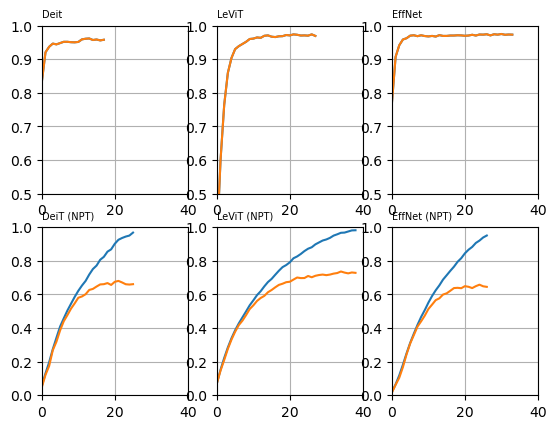

In [42]:
dist_font_size = 7

fig, axs = plt.subplots(2,3)
axs[0,0].set_title('Deit', fontsize=dist_font_size, loc='left')
axs[0,0].plot(deit_train['epoch'], deit['top_1_acc'])
axs[0,0].plot(deit['epoch'], deit['top_1_acc'])
axs[0,0].set_xlim([0,40])
axs[0,0].set_ylim([.5,1])
axs[0,0].grid(True)

axs[0,1].set_title('LeViT', fontsize=dist_font_size, loc='left')
axs[0,1].plot(levit_train['epoch'], levit['top_1_acc'])
axs[0,1].plot(levit['epoch'], levit['top_1_acc'])
axs[0,1].set_xlim([0,40])
axs[0,1].set_ylim([.5,1])
axs[0,1].grid(True)

axs[0,2].set_title('EffNet', fontsize=dist_font_size, loc='left')
axs[0,2].set_title('EffNet', fontsize=dist_font_size, loc='left')
axs[0,2].plot(effnet_train['epoch'], effnet['top_1_acc'])
axs[0,2].plot(effnet['epoch'], effnet['top_1_acc'])
axs[0,2].set_xlim([0,40])
axs[0,2].set_ylim([.5,1])
axs[0,2].grid(True)

axs[1,0].set_title('DeiT (NPT)', fontsize=dist_font_size, loc='left')
axs[1,0].plot(deit_npt_train['epoch'], deit_npt_train['top_1_acc'])
axs[1,0].plot(deit_npt['epoch'], deit_npt['top_1_acc'])
axs[1,0].set_xlim([0,40])
axs[1,0].set_ylim([0,1])
axs[1,0].grid(True)

axs[1,1].set_title('LeViT (NPT)', fontsize=dist_font_size, loc='left')
axs[1,1].plot(levit_npt_train['epoch'], levit_npt_train['top_1_acc'])
axs[1,1].plot(levit_npt['epoch'], levit_npt['top_1_acc'])
axs[1,1].set_xlim([0,40])
axs[1,1].set_ylim([0,1])
axs[1,1].grid(True)

axs[1,2].set_title('EffNet (NPT)', fontsize=dist_font_size, loc='left')
axs[1,2].plot(effnet_npt_train['epoch'], effnet_npt_train['top_1_acc'])
axs[1,2].plot(effnet_npt['epoch'], effnet_npt['top_1_acc'])
axs[1,2].set_xlim([0,40])
axs[1,2].set_ylim([0,1])
axs[1,2].grid(True)
#fig.savefig('C:\\Users\\Simon\\OneDrive\\Dokumente\\Uni Unterlagen\\09 Bachelorearbeit\\figures\\Training.jpg')

# Comparison on Validation Set

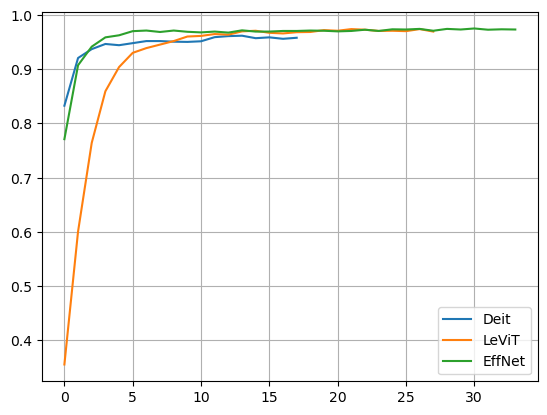

In [5]:
plot_by_epoch('top_1_acc')

In [6]:
def calculate_median(column):
    print("median")
    print(f"effnet: \t{effnet[column].median()}")
    print(f"levit:  \t{levit[column].median()}")
    print(f"deit:   \t{deit[column].median()}")

In [7]:
calculate_median('seconds')

median
effnet: 	354.4660017490387
levit:  	307.47423219680786
deit:   	264.06271636486053


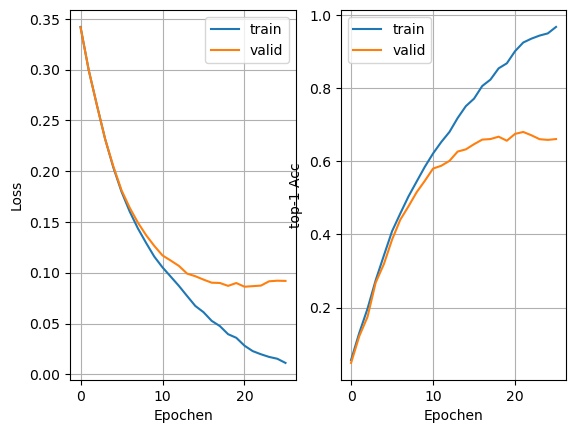

In [8]:
fig, axs = plt.subplots(1,2)

axs[0].plot(deit_npt_train['avr_loss'])
axs[0].plot(deit_npt['avr_loss'])
axs[0].legend(['train','valid'])
axs[0].set_xlabel('Epochen')
axs[0].set_ylabel('Loss')
axs[0].grid(True)

axs[1].plot(deit_npt_train['top_1_acc'])
axs[1].plot(deit_npt['top_1_acc'])
axs[1].legend(['train','valid'])
axs[1].set_xlabel('Epochen')
axs[1].set_ylabel('top-1 Acc')
axs[1].grid(True)


In [9]:
def getDuration(df):
    print(int(df['seconds'].sum()) / 60, "min training")
    print(df['seconds'].median(), "sek Epoche")

## DeiT

In [10]:
getDuration(deit)

79.31666666666666 min training
264.06271636486053 sek Epoche


In [11]:
(deit_train['top_1_acc']-deit['top_1_acc']).max()

0.046922922134399414

In [12]:
deit[deit['top_1_acc'].max() == deit['top_1_acc']]

,epoch,seconds,avr_loss,top_1_acc,top_5_acc,f1_score,precision,recall
13,13,263.565487,0.009479,0.961905,0.993905,0.961905,0.961905,0.961905


In [13]:
deit.tail(1)

,epoch,seconds,avr_loss,top_1_acc,top_5_acc,f1_score,precision,recall
17,17,264.206885,0.01126,0.958095,0.991619,0.958095,0.958095,0.958095


## LeViT

In [14]:
getDuration(levit)

154.73333333333332 min training
307.47423219680786 sek Epoche


In [15]:
levit[levit['top_1_acc'].max() == levit['top_1_acc']]

,epoch,seconds,avr_loss,top_1_acc,top_5_acc,f1_score,precision,recall
21,21,306.217412,0.007788,0.974095,0.995048,0.974095,0.974095,0.974095
26,26,307.537846,0.007983,0.974095,0.995429,0.974095,0.974095,0.974095


In [16]:
levit.tail(1)

,epoch,seconds,avr_loss,top_1_acc,top_5_acc,f1_score,precision,recall
27,27,305.453339,0.009111,0.969524,0.996571,0.969524,0.969524,0.969524


## EffNet

In [17]:
getDuration(effnet)

221.58333333333334 min training
354.4660017490387 sek Epoche


In [18]:
effnet[effnet['top_1_acc'].max() == effnet['top_1_acc']]

,epoch,seconds,avr_loss,top_1_acc,top_5_acc,f1_score,precision,recall
30,30,354.477307,0.007971,0.975238,0.994667,0.975238,0.975238,0.975238


In [19]:
effnet.tail(1)

,epoch,seconds,avr_loss,top_1_acc,top_5_acc,f1_score,precision,recall
33,33,354.276801,0.008594,0.973333,0.995429,0.973333,0.973333,0.973333


## DeiT (npt)

In [20]:
getDuration(deit_npt)

141.46666666666667 min training
263.3668258190155 sek Epoche


In [21]:
deit_npt[deit_npt['top_1_acc'].max() == deit_npt['top_1_acc']]

,epoch,seconds,avr_loss,top_1_acc,top_5_acc,f1_score,precision,recall
21,21,263.288887,0.086783,0.680762,0.872,0.680762,0.680762,0.680762


In [22]:
deit_npt.tail(1)

,epoch,seconds,avr_loss,top_1_acc,top_5_acc,f1_score,precision,recall
25,25,263.592854,0.091947,0.661333,0.865524,0.661333,0.661333,0.661333


## LeViT (npt)

In [23]:
getDuration(levit_npt)

205.05 min training
306.2765259742737 sek Epoche


In [24]:
levit_npt[levit_npt['top_1_acc'].max() == levit_npt['top_1_acc']]

,epoch,seconds,avr_loss,top_1_acc,top_5_acc,f1_score,precision,recall
34,34,308.691926,0.071178,0.736762,0.901333,0.736762,0.736762,0.736762


In [25]:
levit_npt.tail(1)

,epoch,seconds,avr_loss,top_1_acc,top_5_acc,f1_score,precision,recall
38,38,305.763392,0.072086,0.728762,0.897524,0.728762,0.728762,0.728762


## EffNet (npt)

In [26]:
getDuration(effnet_npt)

165.25 min training
356.5167021751404 sek Epoche


In [27]:
effnet_npt[effnet_npt['top_1_acc'] == effnet_npt['top_1_acc'].max()]

,epoch,seconds,avr_loss,top_1_acc,top_5_acc,f1_score,precision,recall
24,24,349.715442,0.094748,0.658286,0.853333,0.658286,0.658286,0.658286


In [28]:
effnet_npt.tail(1)

,epoch,seconds,avr_loss,top_1_acc,top_5_acc,f1_score,precision,recall
26,26,350.131984,0.096127,0.645333,0.852952,0.645333,0.645333,0.645333
